### 데이터 확인하기

In [24]:
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

from gensim.models import Word2Vec

In [2]:
data = pd.read_csv('spam.csv')
data.head()

## v1 에는 spam 여부 존재
## v2 에는 해당 메일의 내용이 존재

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 불용어 처리, 특수 문자 제거 등 전처리 포함하여 tokenizing하기

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    return tokens

data['v2'] = data['v2'].apply(preprocess_and_tokenize)

data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rltjq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rltjq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"


### One-hot encoding, Word2Vec, CBOW, Skip-gram, GloVe 등의 방법으로 임베딩하기

In [27]:
## Word2Vec

# Word2Vec 모델 훈련
model = Word2Vec(sentences=data['v2'], vector_size=100, window=5, min_count=1, workers=4)

# 단어 벡터 얻기
word_vector = model.wv['early']
word_vector

array([-0.06986307,  0.14995301,  0.03342165,  0.06137059,  0.02246896,
       -0.2178765 ,  0.05017412,  0.35854843, -0.12278972, -0.10167096,
       -0.05854681, -0.23890205, -0.08244114,  0.02483893,  0.05929096,
       -0.17287198,  0.03885813, -0.16163658,  0.00781505, -0.27108404,
        0.06811018,  0.0793024 ,  0.07310059, -0.05099624, -0.05006726,
       -0.01450189, -0.14730953, -0.12194355, -0.16887283, -0.02864923,
        0.16524245,  0.00862376,  0.05461064, -0.12180393, -0.05495283,
        0.16746363,  0.03929473, -0.14415832, -0.10392189, -0.28590038,
        0.03591592, -0.19356759, -0.04620149, -0.02738879,  0.11724696,
       -0.09667785, -0.15864763, -0.01756402,  0.10307595,  0.12137249,
        0.04181437, -0.15808497, -0.00967243, -0.03921035, -0.09618383,
        0.07827477,  0.11997481, -0.00828077, -0.1457721 ,  0.07609379,
        0.04266411,  0.05215785, -0.05996056, -0.02403902, -0.14880484,
        0.13354173,  0.05920873,  0.1306858 , -0.20317103,  0.22

### 유사도, Wordcloud, 이진 분류, 그래프 해석 등 유의미한 해석 도출하기

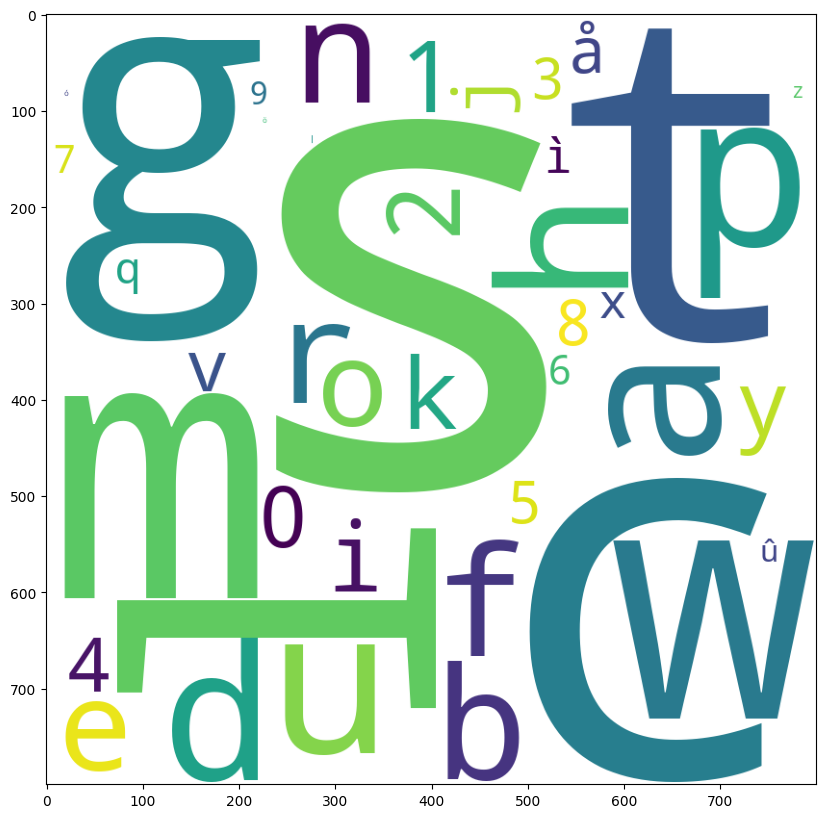

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_dict = {}

def create_dict(lst):
    for i in lst:
        try:
            word_dict[i[0]] += 1
        except:
            word_dict[i[0]] = 1

data['v2'].apply(create_dict)

freq = word_dict
cloud = WordCloud(background_color='white',
                  width=800, height=800)

word_cloud = cloud.generate_from_frequencies(freq)

arr = word_cloud.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr)
plt.show()
